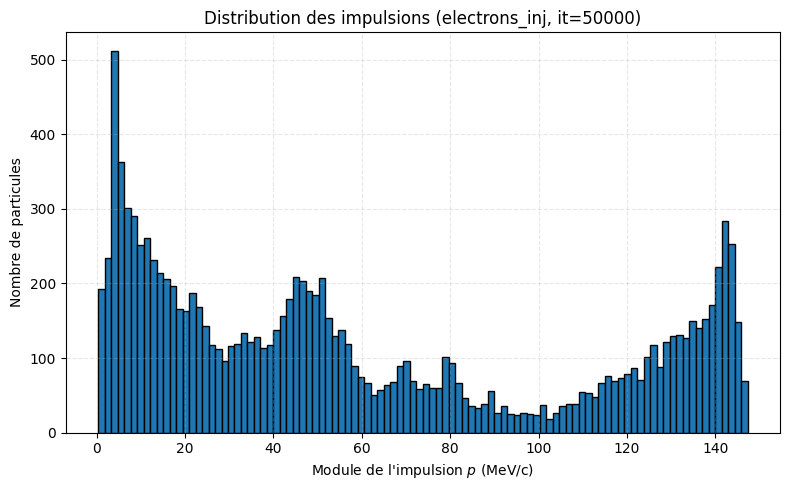

Nombre total calculé par somme des bins : 12167
Nombre total direct (len)             : 12167


In [23]:
# ─── analyse_distribution.ipynb — cellule unique ───────────────────────────────
import openpmd_api as io
import numpy as np
import matplotlib.pyplot as plt

# ─── 1) Paramètres ─────────────────────────────────────────────────────────────
#FILE      = "3D_Particles_Gauss3D/electrons.bp5"   # chemin vers votre fichier OpenPMD
#FILE      = "3D_dataset/openpmd_000100.bp5"   # chemin vers votre fichier OpenPMD
FILE      = "data_gab2/openpmd_50000.bp/"   # chemin vers votre fichier OpenPMD
SPECIES   = "electrons_inj"                    # nom de l'espèce
ITERATION = 50000                             # itération à lire (0 pour la première)
BINS      = 100                            # nombre de bins pour l’histogramme
# ────────────────────────────────────────────────────────────────────────────────

MEV_C_CONVERSION = 5.3442859e-22

# 2) Ouvre la série en lecture seule
series = io.Series(FILE, io.Access.read_only)

# 3) Sélectionne l’itération
it = series.iterations[ITERATION]

# 4) Récupère l’espèce et ses composantes px, py, pz
sp = it.particles[SPECIES]
px = sp["momentum"]["x"][:]
py = sp["momentum"]["y"][:] 
pz = sp["momentum"]["z"][:] 
weights = sp["weighting"][:]

# 5) Ferme la série
series.close()

# 6) Calcule le module p = sqrt(px² + py² + pz²)
px = px / MEV_C_CONVERSION
py = py / MEV_C_CONVERSION
pz = pz / MEV_C_CONVERSION
p_mod = np.sqrt(px**2 + py**2 + pz**2) 

# 7) Calcule histogramme via numpy.histogram
counts, bin_edges = np.histogram(p_mod, bins=BINS)

# 8) Trace l’histogramme
plt.figure(figsize=(8,5))
plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # abscisses = centres de bins
    counts,
    width=(bin_edges[1] - bin_edges[0]),
    edgecolor='black'
)
plt.xlabel("Module de l'impulsion $p$ (MeV/c)")
plt.ylabel("Nombre de particules")
plt.title(f"Distribution des impulsions ({SPECIES}, it={ITERATION})")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 9) Somme des bins = nombre total de particules
total_via_bins = counts.sum()
total_direct     = p_mod.size
print(f"Nombre total calculé par somme des bins : {total_via_bins}")
print(f"Nombre total direct (len)             : {total_direct}")


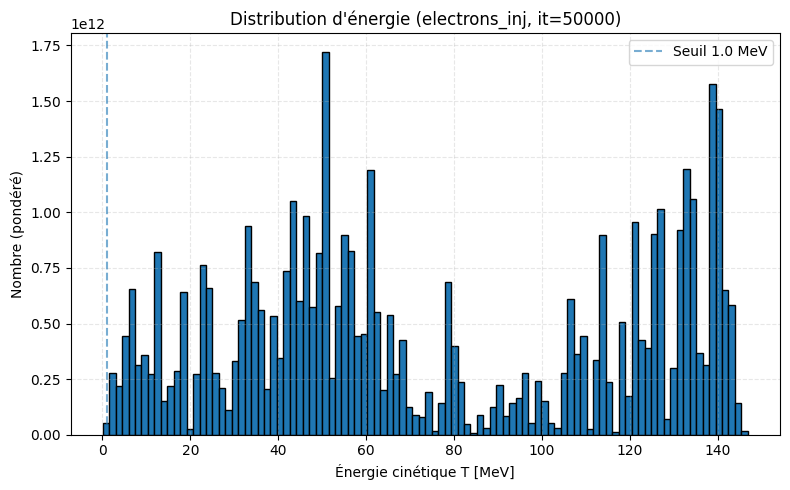

Somme pondérée des bins     : 4.41722e+13
Somme des poids (référence) : 4.41722e+13
T moyenne (non pondérée)    : 59.7046 MeV
T moyenne (pondérée)        : 75.6235 MeV


In [24]:
# Constantes
MEV_C_CONVERSION = 5.3442859e-22            # 1 (MeV/c) = 5.344...e-22 kg·m/s
MASS_E_MEV       = 0.511                    # masse e- en MeV (i.e. mc^2)

# Formule : T = m ( sqrt(1 + (p/m)^2 ) - 1 ), avec m en MeV, p en MeV/c
ratio = p_mod / MASS_E_MEV
E_kin = MASS_E_MEV * (np.sqrt(1.0 + ratio**2) - 1.0)     # MeV

# ─── 6) Histogramme 1D pondéré de T ───────────────────────────────────────────
counts, bin_edges = np.histogram(E_kin, bins=BINS, weights=weights)
centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(8,5))
plt.bar(centers, counts, width=np.diff(bin_edges), edgecolor='black', align='center')
plt.axvline(E_THRESHOLD, linestyle='--', alpha=0.6, label=f"Seuil {E_THRESHOLD} MeV")
plt.xlabel("Énergie cinétique T [MeV]")
plt.ylabel("Nombre (pondéré)")
plt.title(f"Distribution d'énergie ({SPECIES}, it={ITERATION})")
plt.grid(alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# ─── 7) Sanity checks & stats ─────────────────────────────────────────────────
print(f"Somme pondérée des bins     : {counts.sum():.6g}")
print(f"Somme des poids (référence) : {weights.sum():.6g}")
print(f"T moyenne (non pondérée)    : {E_kin.mean():.4f} MeV")
print(f"T moyenne (pondérée)        : {np.average(E_kin, weights=weights):.4f} MeV")

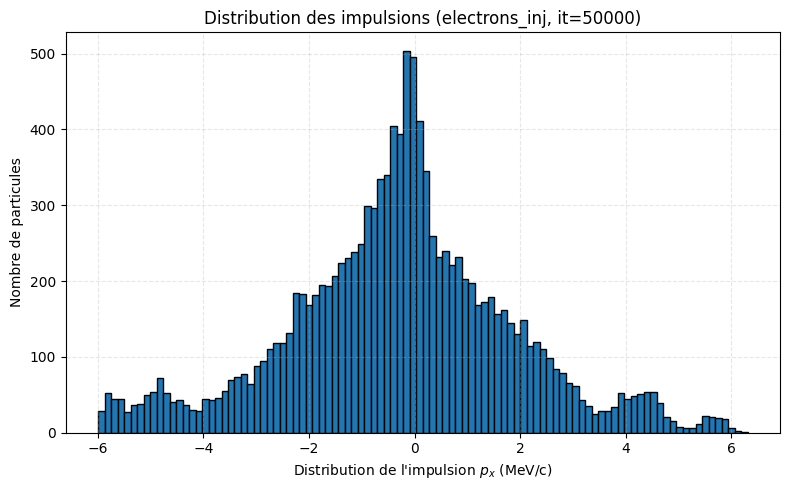

Nombre total calculé par somme des bins : 12167
Nombre total direct (len)             : 12167


In [25]:
# 7) Calcule histogramme via numpy.histogram
counts, bin_edges = np.histogram(px, bins=BINS)

# 8) Trace l’histogramme
plt.figure(figsize=(8,5))
plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # abscisses = centres de bins
    counts,
    width=(bin_edges[1] - bin_edges[0]),
    edgecolor='black'
)
plt.xlabel("Distribution de l'impulsion $p_x$ (MeV/c)")
plt.ylabel("Nombre de particules")
plt.title(f"Distribution des impulsions ({SPECIES}, it={ITERATION})")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 9) Somme des bins = nombre total de particules
total_via_bins = counts.sum()
total_direct     = p_mod.size
print(f"Nombre total calculé par somme des bins : {total_via_bins}")
print(f"Nombre total direct (len)             : {total_direct}")


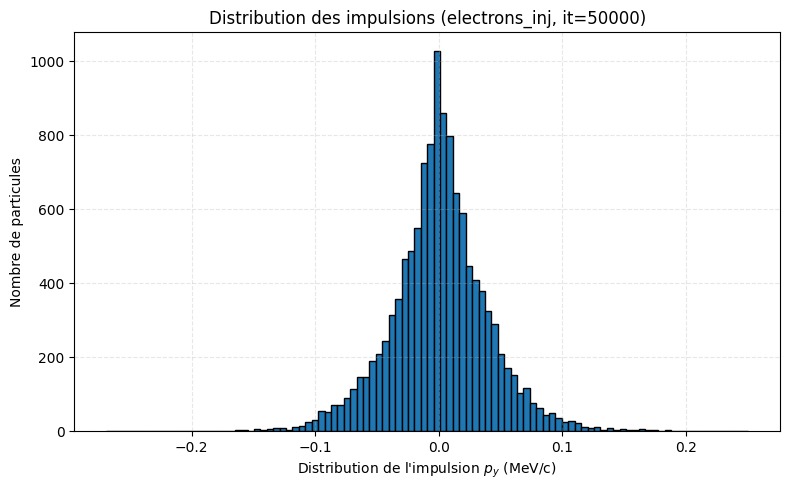

Nombre total calculé par somme des bins : 12167
Nombre total direct (len)             : 12167


In [26]:
# 7) Calcule histogramme via numpy.histogram
counts, bin_edges = np.histogram(py, bins=BINS)

# 8) Trace l’histogramme
plt.figure(figsize=(8,5))
plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # abscisses = centres de bins
    counts,
    width=(bin_edges[1] - bin_edges[0]),
    edgecolor='black'
)
plt.xlabel("Distribution de l'impulsion $p_y$ (MeV/c)")
plt.ylabel("Nombre de particules")
plt.title(f"Distribution des impulsions ({SPECIES}, it={ITERATION})")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 9) Somme des bins = nombre total de particules
total_via_bins = counts.sum()
total_direct     = p_mod.size
print(f"Nombre total calculé par somme des bins : {total_via_bins}")
print(f"Nombre total direct (len)             : {total_direct}")

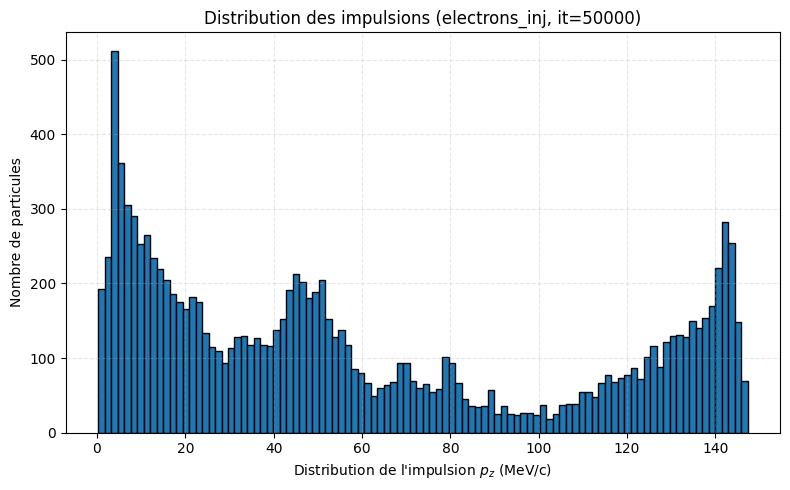

Nombre total calculé par somme des bins : 12167
Nombre total direct (len)             : 12167


In [27]:
# 7) Calcule histogramme via numpy.histogram
counts, bin_edges = np.histogram(pz, bins=BINS)

# 8) Trace l’histogramme
plt.figure(figsize=(8,5))
plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # abscisses = centres de bins
    counts,
    width=(bin_edges[1] - bin_edges[0]),
    edgecolor='black'
)
plt.xlabel("Distribution de l'impulsion $p_z$ (MeV/c)")
plt.ylabel("Nombre de particules")
plt.title(f"Distribution des impulsions ({SPECIES}, it={ITERATION})")
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 9) Somme des bins = nombre total de particules
total_via_bins = counts.sum()
total_direct     = p_mod.size
print(f"Nombre total calculé par somme des bins : {total_via_bins}")
print(f"Nombre total direct (len)             : {total_direct}")

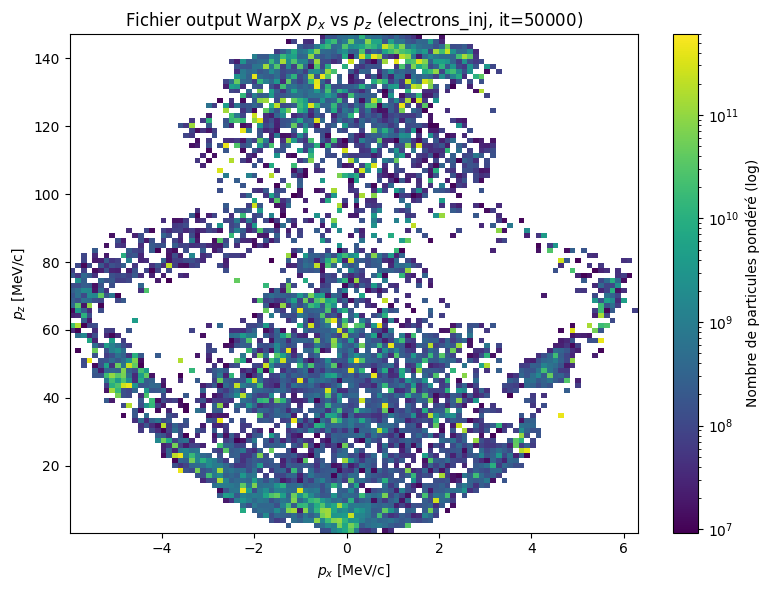

In [28]:
from matplotlib.colors import LogNorm

# ─── 6) Histogramme 2D pondéré ────────────────────────────────────────────────
hist, xedges, yedges = np.histogram2d(px, pz, bins=BINS, weights=weights)

# ─── 7) Tracé logarithmique ───────────────────────────────────────────────────
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(xedges, yedges)
pcm = plt.pcolormesh(X, Y, hist.T, cmap="viridis", norm=LogNorm(), shading='auto')
plt.colorbar(pcm, label="Nombre de particules pondéré (log)")
plt.xlabel("$p_x$ [MeV/c]")
plt.ylabel("$p_z$ [MeV/c]")
plt.title(f"Fichier output WarpX $p_x$ vs $p_z$ ({SPECIES}, it={ITERATION})")
plt.tight_layout()
plt.show()

Particules conservées: 12028 / 12167


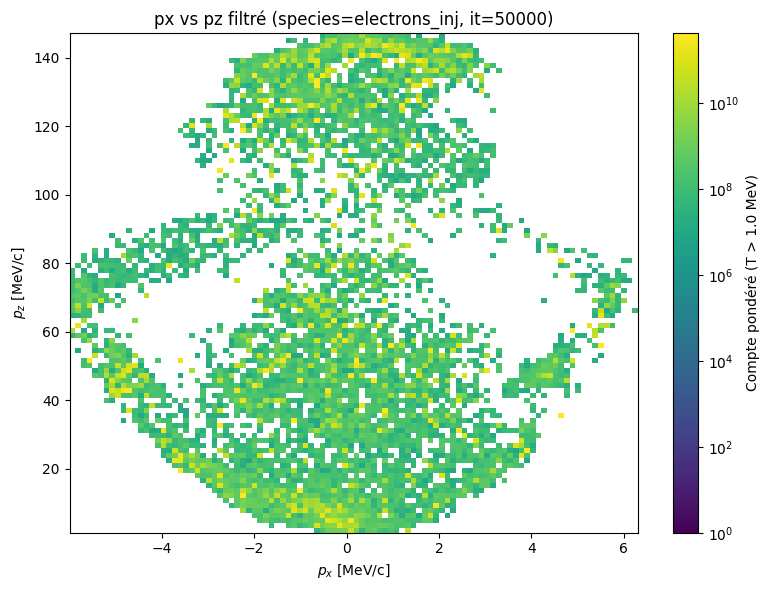

In [29]:
MASS_E_MEV        = 0.511  
E_THRESHOLD       = 1.0     
p_mod = np.sqrt(px**2 + py**2 + pz**2)          # MeV/c
E_tot = np.sqrt(p_mod**2 + MASS_E_MEV**2)       # MeV
E_kin = E_tot - MASS_E_MEV                      # MeV
# 6) Filtrage T > E_THRESHOLD
mask    = E_kin > E_THRESHOLD
px_filt = px[mask]
pz_filt = pz[mask]
w_filt  = weights[mask]

print(f"Particules conservées: {mask.sum()} / {mask.size}")

# 7) Histogramme 2D pondéré
hist, xedges, yedges = np.histogram2d(px_filt, pz_filt, bins=BINS, weights=w_filt)

# 8) Tracé log
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(xedges, yedges)
pcm = plt.pcolormesh(X, Y, hist.T, cmap="viridis", norm=LogNorm(vmin=1), shading="auto")
plt.colorbar(pcm, label=f"Compte pondéré (T > {E_THRESHOLD} MeV)")
plt.xlabel(r"$p_x$ [MeV/c]")
plt.ylabel(r"$p_z$ [MeV/c]")
plt.title(f"px vs pz filtré (species={SPECIES}, it={ITERATION})")
plt.tight_layout()
plt.show()
